In [13]:
import os
import pandas as pd
import glob
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [14]:

df = pd.read_csv("Epileptic Seizure Recognition.csv")
df.head()



,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [15]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [16]:
#label_encoder = preprocessing.LabelEncoder()
#df['Direction']= label_encoder.fit_transform(df['Direction'])




In [17]:
columns = list(df.columns.values[1:-1])

min_max = preprocessing.MinMaxScaler()
df[columns] = min_max.fit_transform(df[columns])

In [18]:
df['y'] = df['y'].replace([2,3,4,5],0)
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,0.553717,0.571107,0.584371,0.598207,0.599275,0.526728,0.486466,0.462484,0.464883,...,0.507684,0.554390,0.544073,0.521051,0.489858,0.454331,0.434953,0.435612,0.474893,0
1,X15.V1.924,0.624123,0.625176,0.620328,0.629447,0.637957,0.579905,0.551431,0.535948,0.536146,...,0.557355,0.603836,0.603850,0.593542,0.562101,0.528396,0.505486,0.495495,0.522970,1
2,X8.V1.1,0.506872,0.506618,0.506229,0.522997,0.531581,0.481668,0.457592,0.445752,0.451505,...,0.527991,0.578064,0.570753,0.551440,0.515143,0.479717,0.456113,0.448331,0.478900,0
3,X16.V1.60,0.486396,0.489158,0.492356,0.507087,0.514355,0.465155,0.445991,0.438693,0.450990,...,0.489846,0.534612,0.527524,0.521051,0.494860,0.467417,0.446447,0.439322,0.471154,0
4,X20.V1.54,0.513324,0.499296,0.491789,0.504194,0.517679,0.478310,0.468162,0.464837,0.467970,...,0.513447,0.559485,0.550490,0.535296,0.507085,0.470557,0.443574,0.434022,0.469017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,0.509677,0.511405,0.513024,0.526179,0.530372,0.479989,0.460686,0.453856,0.461796,...,0.516465,0.563680,0.558595,0.547009,0.518199,0.482858,0.455590,0.445151,0.475694,0
11496,X19.V1.354,0.502665,0.514503,0.527463,0.555973,0.583862,0.550798,0.535705,0.527582,0.523025,...,0.494512,0.548996,0.552178,0.549858,0.525979,0.500131,0.485371,0.488606,0.533921,1
11497,X8.V1.28,0.519776,0.519290,0.515855,0.529071,0.544273,0.499020,0.479247,0.462484,0.474402,...,0.494512,0.544501,0.533941,0.525799,0.499861,0.479717,0.464734,0.457340,0.486378,0
11498,X10.V1.932,0.504628,0.510560,0.516988,0.530229,0.540647,0.495102,0.474091,0.469804,0.479033,...,0.545554,0.599341,0.604525,0.590693,0.550709,0.510076,0.483020,0.473238,0.503205,0


              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1980
           1       0.69      0.99      0.82       320

    accuracy                           0.94      2300
   macro avg       0.85      0.96      0.89      2300
weighted avg       0.96      0.94      0.94      2300



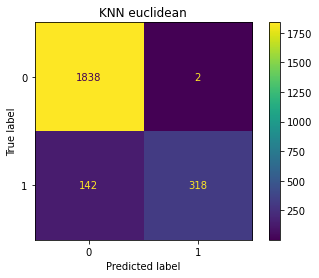

In [20]:
x=df.drop(['y','Unnamed'], axis=1)
y=df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42 ,stratify=y)
#x_train, x_test, y_train, y_test = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plot_confusion_matrix(model, x_test, y_test)
print(classification_report(y_pred, y_test))
plt.title("KNN euclidean")
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2940
           1       0.73      0.99      0.84       510

    accuracy                           0.94      3450
   macro avg       0.86      0.96      0.90      3450
weighted avg       0.96      0.94      0.95      3450



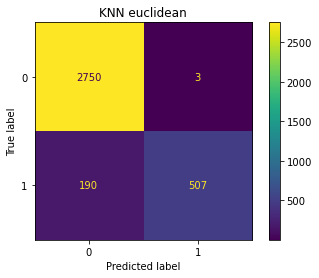

In [24]:
model1=KNeighborsClassifier(n_neighbors=1)

model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_test)
plot_confusion_matrix(model1, x_test, y_test)
print(classification_report(y_pred1, y_test))
plt.title("KNN euclidean")
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1839
           1       0.85      0.85      0.85       461

    accuracy                           0.94      2300
   macro avg       0.90      0.90      0.90      2300
weighted avg       0.94      0.94      0.94      2300



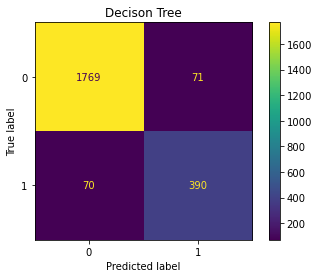

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_pred, y_test))
plot_confusion_matrix(dt, x_test, y_test)
plt.title("Decison Tree")
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2854
           1       0.83      0.97      0.89       596

    accuracy                           0.96      3450
   macro avg       0.91      0.96      0.93      3450
weighted avg       0.97      0.96      0.96      3450



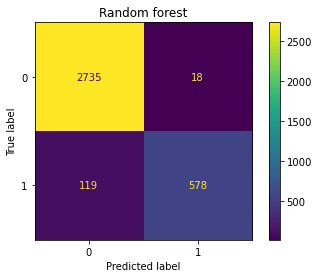

In [26]:
rf = RandomForestClassifier(max_depth=10, random_state=42)

rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

print(classification_report(y_pred2, y_test))

plot_confusion_matrix(rf, x_test, y_test)
plt.title("Random forest")
plt.show()

In [22]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import seaborn as sns


In [23]:
print(df.shape)

x=df.drop(['y','Unnamed'], axis=1)
y=df['y']

x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=17,test_size=0.3)

CNN_Model = Sequential()

CNN_Model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation='relu', input_shape = (x_train.shape[1],1)))
CNN_Model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu')) 
CNN_Model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation='relu'))    

CNN_Model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
CNN_Model.add(Dropout(0.5))

CNN_Model.add(Flatten())

CNN_Model.add(Dense(units = 512, activation='relu'))
CNN_Model.add(Dense(units = 1024, activation='relu'))
CNN_Model.add(Dense(units = 6, activation='softmax'))

CNN_Model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

Epochs = CNN_Model.fit(x_train, y_train, epochs = 10)

(11500, 180)
Epoch 1/10
252/252 [==============================] - 46s 177ms/step - loss: 0.4664 - accuracy: 0.8304
Epoch 2/10
252/252 [==============================] - 44s 175ms/step - loss: 0.1998 - accuracy: 0.9360
Epoch 3/10
252/252 [==============================] - 43s 172ms/step - loss: 0.1571 - accuracy: 0.9453
Epoch 4/10
252/252 [==============================] - 44s 176ms/step - loss: 0.1414 - accuracy: 0.9514
Epoch 5/10
252/252 [==============================] - 43s 171ms/step - loss: 0.1393 - accuracy: 0.9522
Epoch 6/10
252/252 [==============================] - 45s 178ms/step - loss: 0.1168 - accuracy: 0.9596
Epoch 7/10
252/252 [==============================] - 43s 172ms/step - loss: 0.1106 - accuracy: 0.9620
Epoch 8/10
252/252 [==============================] - 44s 175ms/step - loss: 0.1029 - accuracy: 0.9642
Epoch 9/10
252/252 [==============================] - 44s 174ms/step - loss: 0.0910 - accuracy: 0.9675
Epoch 10/10
252/252 [==============================] - 44s 1